#### Parte 3 de 4 do Script em Python

#### Nesta terceira parte irei realizar as seguintes análises utilizando o dataset limpo:

■    Calcular o total de vendas (Quantidade * Preço) por produto.

■    Identifique o produto com o maior número de vendas totais.

#### Vamos importar as bibliotecas necessárias pra esse cálculo. Utilizarei o Pandas porque é o suficiente para cálculos simples e agrupamentos.

In [54]:
import pandas as pd

#### Chamando minha tabela limpa para trabalharmos nela

In [55]:
df= pd.read_csv('data_clean.csv')

#### Criando uma coluna nova "Preço Total" e calculando QUANTIDADE VEZES PREÇO

In [56]:
df['Total_vendas'] = df['Quantidade'] * df['Preço']

#### Chamei pra visualizar as 15 linhas só pra ter uma ideia de como ficou e deu certo

In [57]:
df.head(15)

,Unnamed: 0.1,Unnamed: 0,ID,Data,Produto,Tamanho,Preço,Quantidade,Categoria,Forma de Pagamento,Hora,Valor Total,Total_vendas
0,0,0,610,2023-10-30,Sorvete,300ml,13,1,Natural,debito,19:06:00,13,13
1,2,2,416,2023-07-23,Acai,700ml,20,1,Natural,pix,12:35:00,20,20
2,3,3,666,2023-05-28,Sorvete,700ml,20,2,Batido com frutas,pix,17:05:00,40,40
3,4,4,546,2023-05-05,Sorvete,700ml,20,1,Batido com frutas,pix,18:26:00,20,20
4,5,5,996,2023-10-29,Sorvete,300ml,13,1,Batido com frutas,credito,16:46:00,13,13
5,6,6,903,2023-04-16,Acai,500ml,16,1,Natural,credito,14:08:00,16,16
6,7,7,232,2023-12-31,Acai,700ml,20,1,Batido com frutas,credito,15:44:00,20,20
7,8,8,557,2023-02-19,Sorvete,300ml,13,2,Natural,credito,13:26:00,26,26
8,9,9,119,2023-11-18,Sorvete,700ml,20,1,Natural,credito,19:13:00,20,20
9,10,10,813,2023-04-22,Acai,400ml,14,2,Batido com frutas,pix,11:06:00,28,28


In [58]:
#Calculando a média de meus produtos só pra ter uma ideia do preço. (por curiosidade mesmo)
df["Preço"].mean()


14.402877697841726

In [59]:
mais_vendido = df.groupby('Produto')['Total_vendas'].sum()

# Exibindo o resultado
print(mais_vendido)


Produto
Acai       4809
Sorvete    4184
Name: Total_vendas, dtype: int64


#### Identificamos que o produto mais vendido foi o açai (uma diferença de cerca de 12%)

##                                                  Parte 4 de 4 do Script - Análise Exploratória de Dados de Vendas


Com o mesmo dataset simulado da tarefa anterior, vamos criar visualizações/gráficos e com eles devemos:

■    Criar um gráfico de linha mostrando a tendência de vendas ao longo do tempo, analisando os dados mensalmente.

■    Identificar e descrever pelo menos dois padrões ou insights interessantes que observei nos dados.

#### Vou começar importando as bibliotecas necessárias
#### Pandas: Para manipulação e análise dos dados. 
#### Matplotlib: Para criar visualizações básicas, como gráficos de linha.

In [60]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [61]:
#visualizando que tipo de dados são os meus pois preciso converter alguns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0.1        417 non-null    int64 
 1   Unnamed: 0          417 non-null    int64 
 2   ID                  417 non-null    int64 
 3   Data                417 non-null    object
 4   Produto             417 non-null    object
 5   Tamanho             417 non-null    object
 6   Preço               417 non-null    int64 
 7   Quantidade          417 non-null    int64 
 8   Categoria           417 non-null    object
 9   Forma de Pagamento  417 non-null    object
 10  Hora                417 non-null    object
 11  Valor Total         417 non-null    int64 
 12  Total_vendas        417 non-null    int64 
dtypes: int64(7), object(6)
memory usage: 42.5+ KB


#### Vou converter a coluna 'Data' para datetime se ainda não estiver. Ela permite o Pandas reconhecer esses valores 'Data' como datas, facilitando a manipulação, análise e visualização futuramente.

In [62]:
df['Data'] = pd.to_datetime(df['Data'])

In [63]:
df['ano_mes'] = df['Data'].dt.to_period('M')
print()

In [64]:
vendas_mensais = df.groupby('ano_mes')['Total_vendas'].sum()


In [65]:
df.head(15)

,Unnamed: 0.1,Unnamed: 0,ID,Data,Produto,Tamanho,Preço,Quantidade,Categoria,Forma de Pagamento,Hora,Valor Total,Total_vendas,ano_mes
0,0,0,610,2023-10-30,Sorvete,300ml,13,1,Natural,debito,19:06:00,13,13,2023-10
1,2,2,416,2023-07-23,Acai,700ml,20,1,Natural,pix,12:35:00,20,20,2023-07
2,3,3,666,2023-05-28,Sorvete,700ml,20,2,Batido com frutas,pix,17:05:00,40,40,2023-05
3,4,4,546,2023-05-05,Sorvete,700ml,20,1,Batido com frutas,pix,18:26:00,20,20,2023-05
4,5,5,996,2023-10-29,Sorvete,300ml,13,1,Batido com frutas,credito,16:46:00,13,13,2023-10
5,6,6,903,2023-04-16,Acai,500ml,16,1,Natural,credito,14:08:00,16,16,2023-04
6,7,7,232,2023-12-31,Acai,700ml,20,1,Batido com frutas,credito,15:44:00,20,20,2023-12
7,8,8,557,2023-02-19,Sorvete,300ml,13,2,Natural,credito,13:26:00,26,26,2023-02
8,9,9,119,2023-11-18,Sorvete,700ml,20,1,Natural,credito,19:13:00,20,20,2023-11
9,10,10,813,2023-04-22,Acai,400ml,14,2,Batido com frutas,pix,11:06:00,28,28,2023-04


#### Irei chamar o gráfico de linhas para analisarmos tendências

#### Vamos dar um nome a este gráfico, ele se chamará "Gráfico A1". Isso será útil para localizar a explicação dele em nossa documentação.

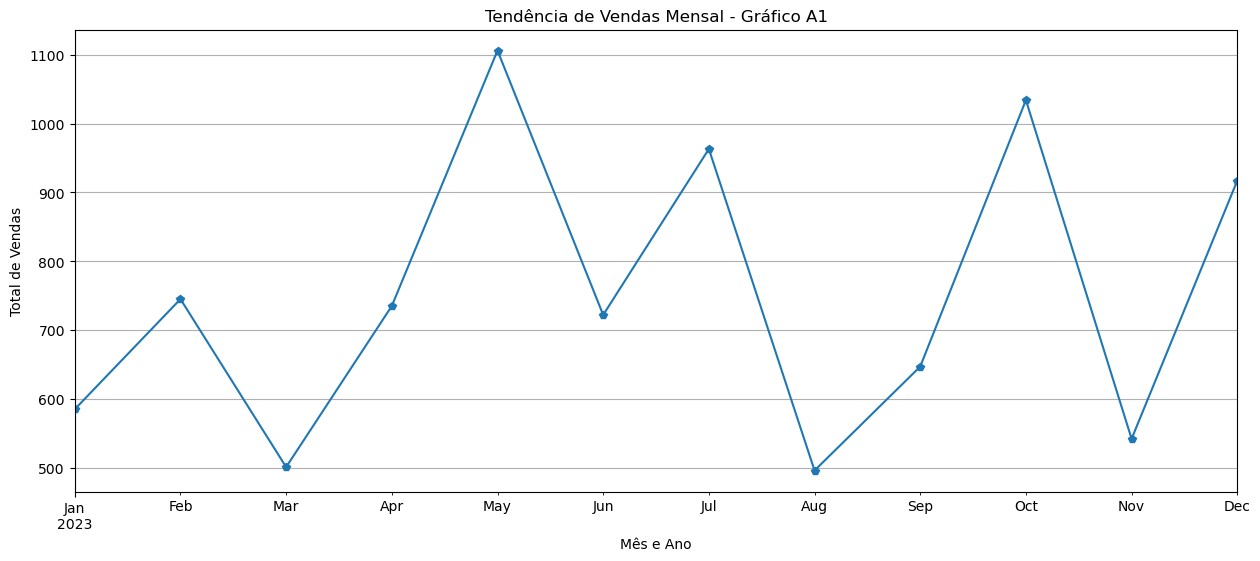

In [66]:
vendas_mensais.plot(kind='line', marker='p', figsize=(15, 6))
plt.title('Tendência de Vendas Mensal - Gráfico A1')
plt.xlabel('Mês e Ano')
plt.ylabel('Total de Vendas')
#vou adicionar grades ao fundo para melhor visualização para assim que olhar já ter ideia da tendência
plt.grid(True)
plt.show()

#GRAFICO A1 PLOTADO

#### Vimos que as vendas tiveram um pico grande, talvez de "8 pra 80". Ao dar o pico máximo ou aumentarem, elas aumentam gradativamente, de 1 a 2 meses pra dar o pico. Porém, ao cair as vendas ela já vai de um mês pro outro. Tivemos 2 picos relativamente alto no ano de 20233, sendo que entre junho e agosto foi pequeno.

#### Vamos fazer um gráfico para ver as vendas de sorvete e açai no mesmo grafico para vermos quem vendeu mais em cada mês.

C:\Users\Pedro Soares\AppData\Local\Temp\ipykernel_10448\290602824.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acai['Mês'] = df_acai['ano_mes'].dt.month
C:\Users\Pedro Soares\AppData\Local\Temp\ipykernel_10448\290602824.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sorvete['Mês'] = df_sorvete['ano_mes'].dt.month


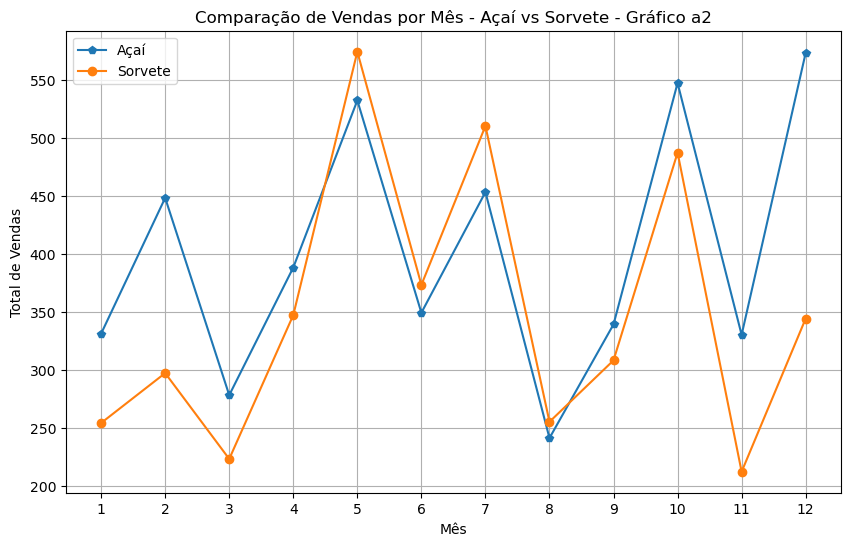

In [68]:
# Filtrando os dados por produto
df_acai = df[df['Produto'] == 'Acai']
df_sorvete = df[df['Produto'] == 'Sorvete']

# Extraindo o mês de 'ano_mes'
df_acai['Mês'] = df_acai['ano_mes'].dt.month
df_sorvete['Mês'] = df_sorvete['ano_mes'].dt.month

# Agrupando as vendas por mês
vendas_acai_por_mes = df_acai.groupby('Mês')['Total_vendas'].sum()
vendas_sorvete_por_mes = df_sorvete.groupby('Mês')['Total_vendas'].sum()

# Definindo os meses de 1 a 12
meses = range(1, 13)

# Plotando os dados
plt.figure(figsize=(10, 6))
plt.plot(meses, vendas_acai_por_mes.reindex(meses, fill_value=0), marker='p', label='Açaí')
plt.plot(meses, vendas_sorvete_por_mes.reindex(meses, fill_value=0), marker='o', label='Sorvete')

# Configurações do gráfico
plt.title('Comparação de Vendas por Mês - Açaí vs Sorvete - Gráfico a2')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(meses)
plt.legend()
plt.grid()
plt.show()

#GRAFICO A2 PLOTADO


#### Os padrões e insights detectados serão escritos e explicados por completo no arquivo "relatorio_insights.pdf"